# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

# Importing Dataset

In [53]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Gathering Data

In [3]:
boston_dataset = load_boston()

In [4]:
type(boston_dataset)

sklearn.utils.Bunch

In [5]:
boston_dataset

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [6]:
dir(boston_dataset)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [7]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

# Features and Data

In [8]:
boston_dataset.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [9]:
type(boston_dataset.data)

numpy.ndarray

In [10]:
boston_dataset.data.shape # it contains 506 rows and 13 columns

(506, 13)

# Creating a dataframe using pandas

In [11]:
data = pd.DataFrame(data=boston_dataset.data, columns=boston_dataset.feature_names) # it does not contain price

data['PRICE'] = boston_dataset.target # adding a price column to the dataframe

In [12]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [13]:
data.count()

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
PRICE      506
dtype: int64

## Cleaning data

In [14]:
pd.isnull(data).any() #Checking for null values

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
PRICE      False
dtype: bool

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


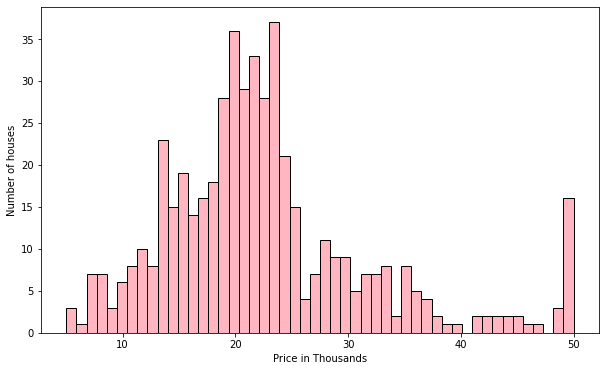

In [16]:
plt.figure(figsize=[10,6])
plt.xlabel("Price in Thousands")
plt.ylabel("Number of houses")
plt.hist(data['PRICE'],bins = 50,ec="black",color="lightpink")
plt.show()

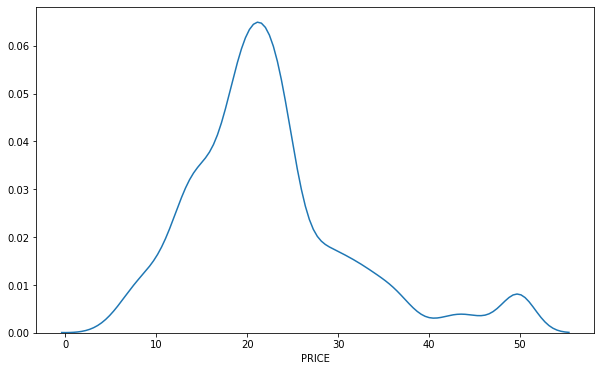

In [17]:
plt.figure(figsize=[10,6])
sns.distplot(data['PRICE'],bins=50,hist = False)
plt.show()

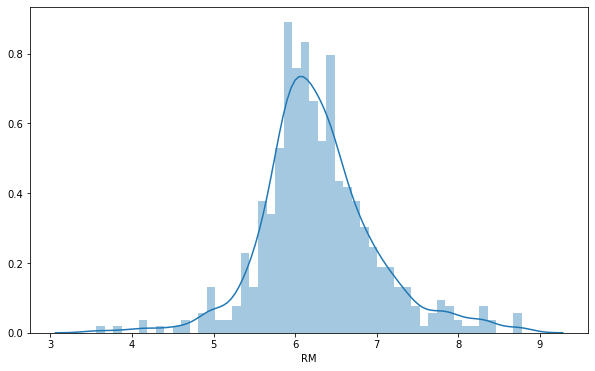

In [18]:
plt.figure(figsize=[10,6])
sns.distplot(data['RM'],bins=50)
plt.show()

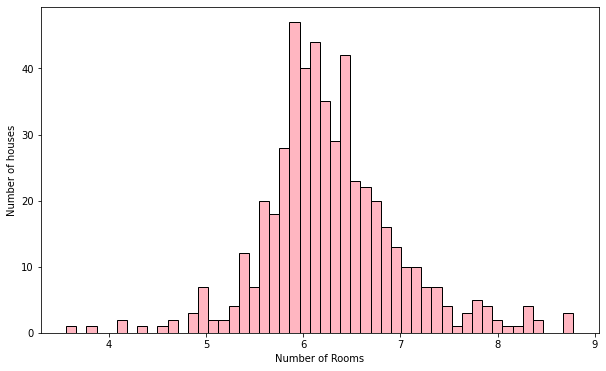

In [19]:
plt.figure(figsize=[10,6])
plt.xlabel("Number of Rooms")
plt.ylabel("Number of houses")
plt.hist(data['RM'],bins = 50,ec="black",color="lightpink")
plt.show()

In [20]:
data['RM'].describe()

count    506.000000
mean       6.284634
std        0.702617
min        3.561000
25%        5.885500
50%        6.208500
75%        6.623500
max        8.780000
Name: RM, dtype: float64

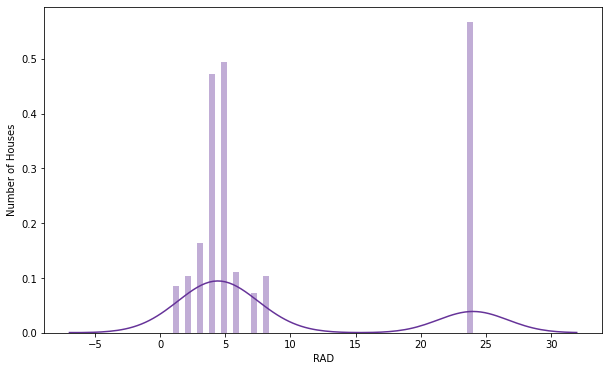

In [21]:
plt.figure(figsize=[10,6])
plt.ylabel("Number of Houses")
sns.distplot(data["RAD"],bins=50,color="#663399")
plt.show()

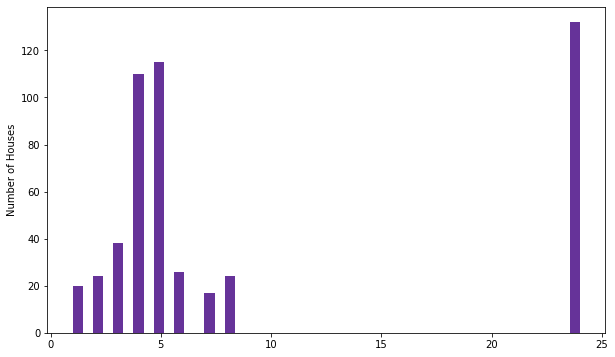

In [22]:
plt.figure(figsize=[10,6])
plt.ylabel("Number of Houses")
plt.hist(data["RAD"],bins=50,color="#663399")
plt.show()

In [23]:
data["RAD"].value_counts()

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
8.0      24
2.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

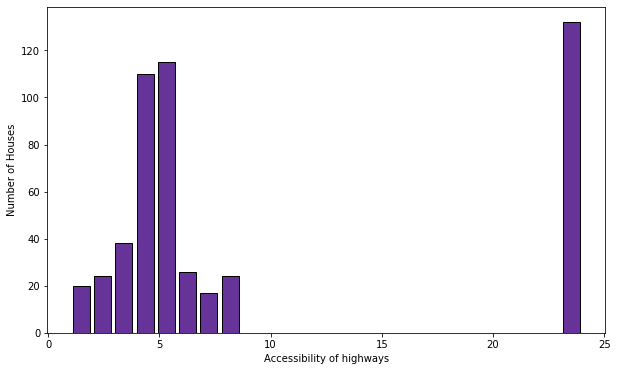

In [24]:
plt.figure(figsize=[10,6])
plt.ylabel("Number of Houses")
plt.xlabel("Accessibility of highways")
plt.hist(data["RAD"],bins=24,color="#663399",ec="black",rwidth=0.8)
plt.show()

In [25]:
data["CHAS"].value_counts()  #houses near rivers

0.0    471
1.0     35
Name: CHAS, dtype: int64

# Descriptive stats : 

In [26]:
data["PRICE"].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: PRICE, dtype: float64

In [27]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Correlation

## $$ \rho_{XY} = corr(X,Y) $$
## $$  -1.0 \leq \rho_{XY} \leq 1.0 $$

In [28]:
data['PRICE'].corr(data['RM']) #calculating corelation between no. of rooms and price

0.6953599470715393

In [29]:
data['PRICE'].corr(data['PTRATIO']) #relation between pupil teacher ratio and price

-0.5077866855375616

In [30]:
data.corr() #we are using pearson correlation

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [31]:
mask = np.zeros_like(data.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = 1
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

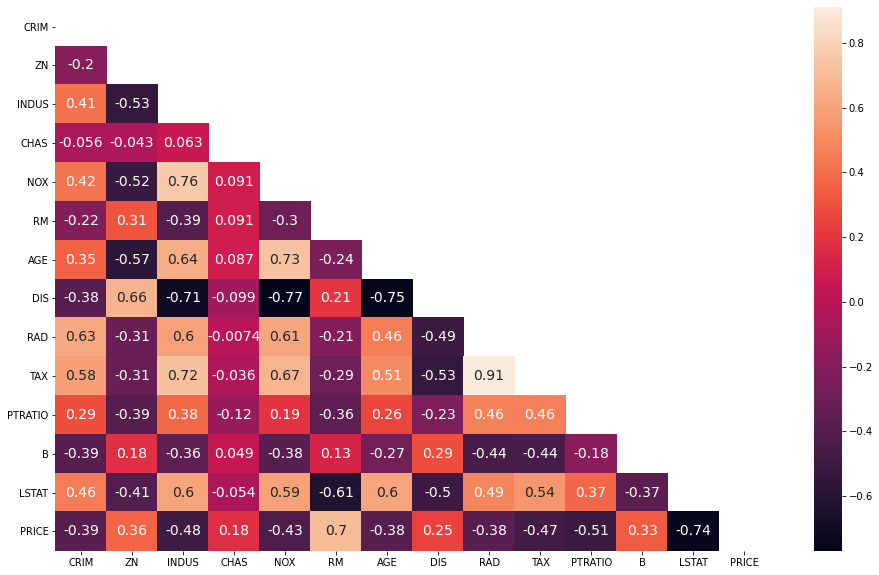

In [32]:
plt.figure(figsize=[16,10])
sns.heatmap(data.corr(),mask=mask,annot=True,annot_kws={ "size":14})
plt.show()

The pearson correlation only considers continuous variables but RAD & TAX have corellation of 0.91 which may be highest but is incorrect and same is case with CHAS.

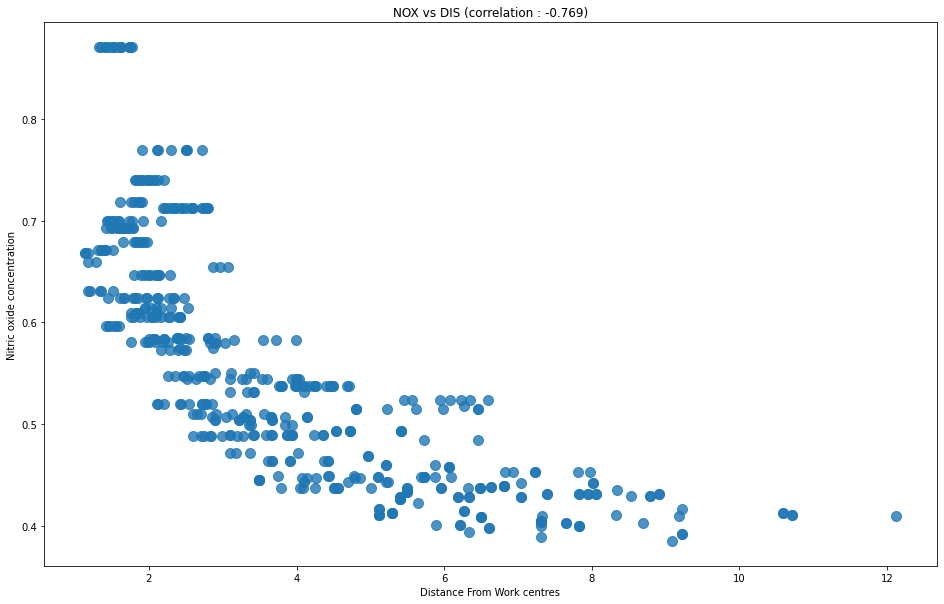

In [33]:
corr = round(data['NOX'].corr(data['DIS']),3)
plt.figure(figsize=[16,10])

plt.scatter(data['DIS'],data['NOX'],alpha = 0.8,s= 100)
plt.title(f"NOX vs DIS (correlation : {corr})")
plt.xlabel("Distance From Work centres")
plt.ylabel("Nitric oxide concentration")
plt.show()

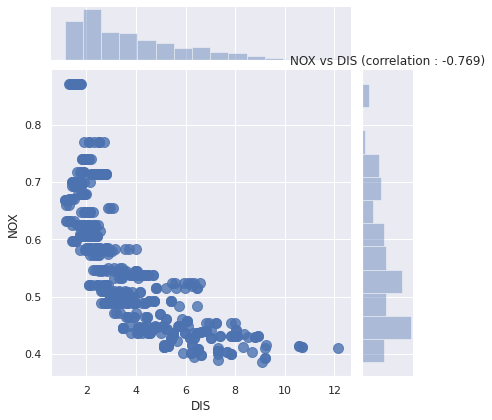

In [34]:
sns.set()
corr = round(data['NOX'].corr(data['DIS']),3)

sns.jointplot(data['DIS'],data['NOX'],alpha = 0.8,s= 100)
plt.title(f"NOX vs DIS (correlation : {corr})")
plt.show()

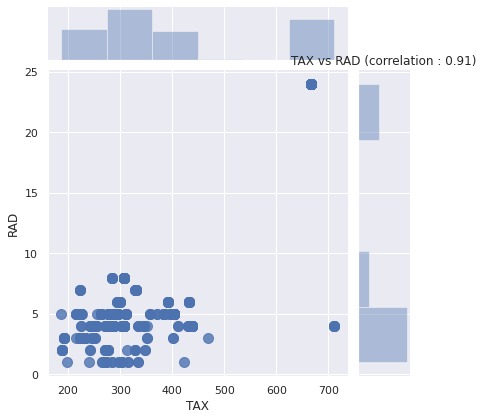

In [35]:
sns.set()
corr = round(data['TAX'].corr(data['RAD']),3)

sns.jointplot(data['TAX'],data['RAD'],alpha = 0.8,s= 100)
plt.title(f"TAX vs RAD (correlation : {corr})")
plt.show()

/home/sanchit/anaconda3/lib/python3.8/site-packages/seaborn/regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


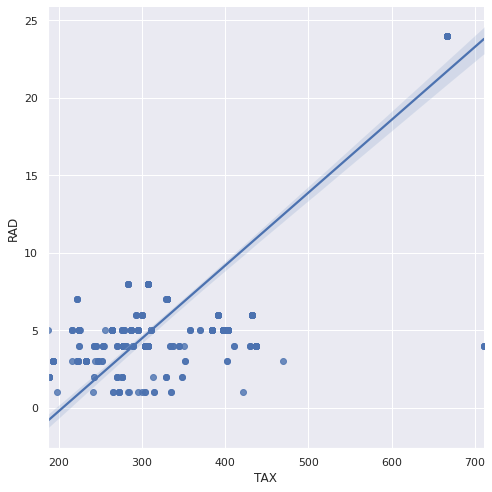

In [36]:
sns.lmplot(x="TAX",y="RAD",data=data,size = 7)

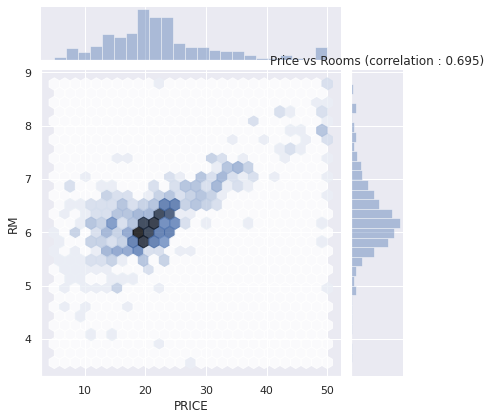

In [37]:
sns.set()
corr = round(data['PRICE'].corr(data['RM']),3)

sns.jointplot(data['PRICE'],data['RM'],alpha = 0.8,kind='hex')
plt.title(f"Price vs Rooms (correlation : {corr})")
plt.show()

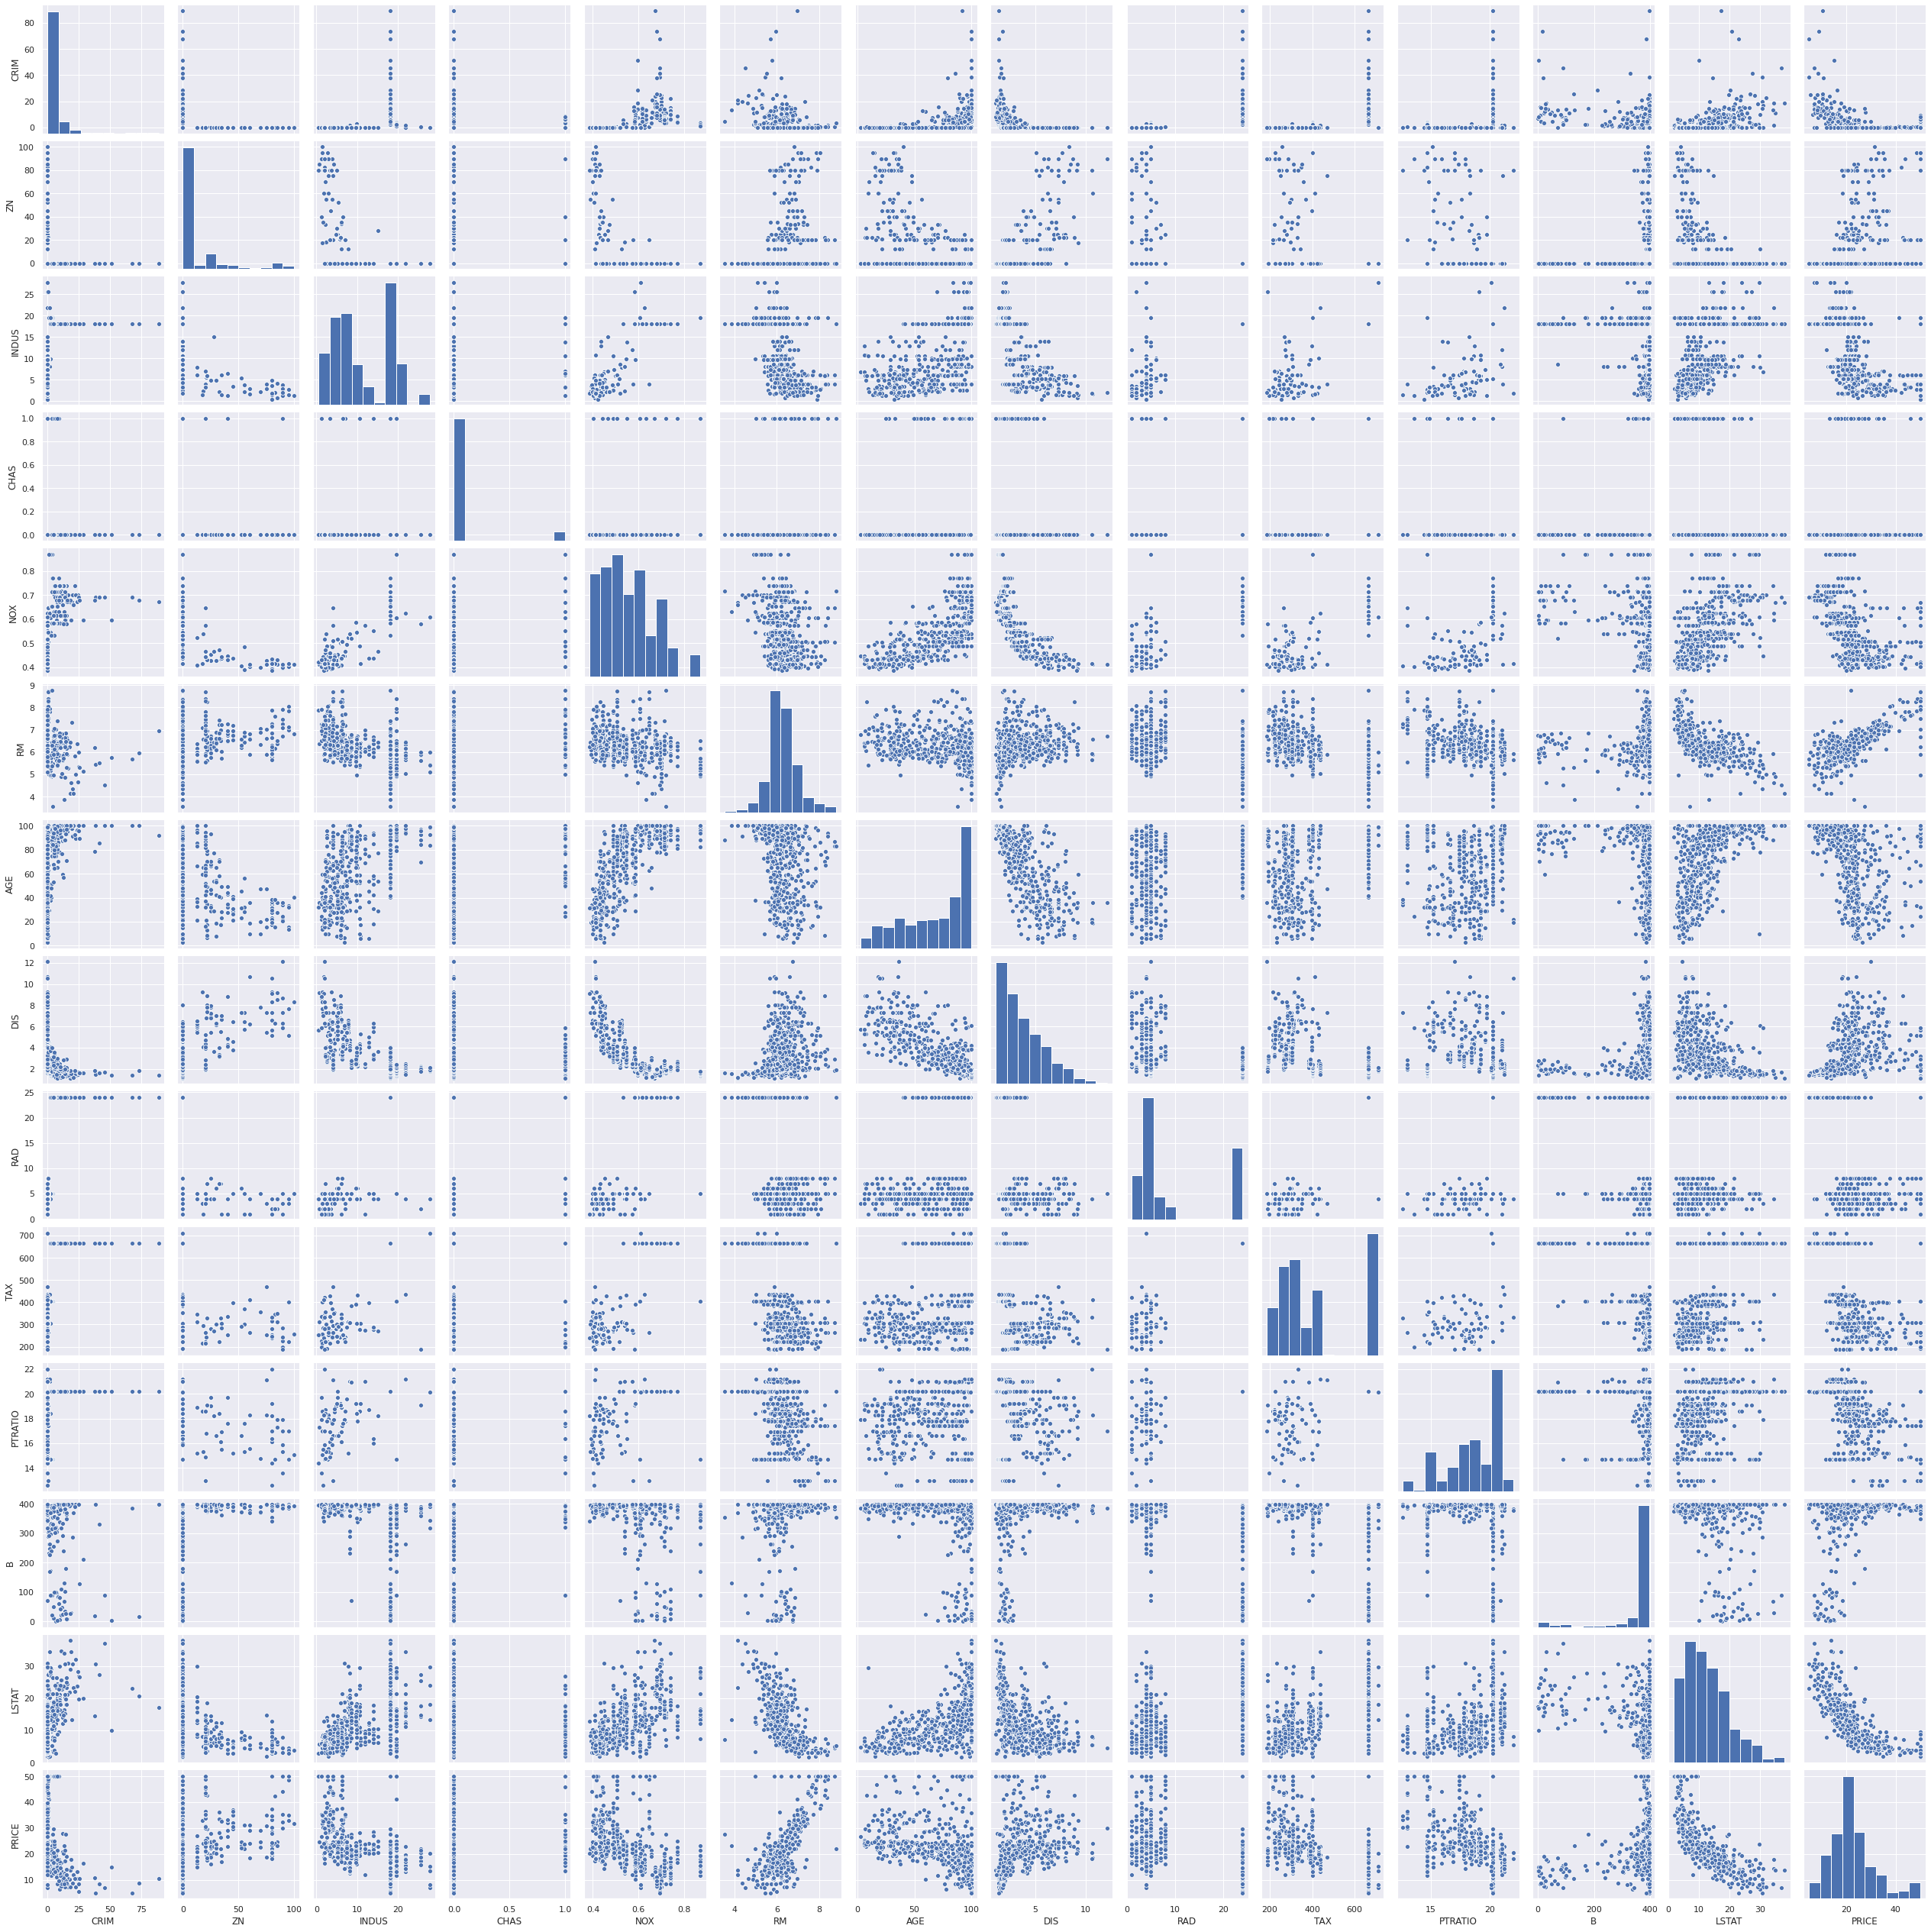

CPU times: user 1min 15s, sys: 440 ms, total: 1min 16s
Wall time: 1min 15s


In [38]:
%%time

sns.pairplot(data)
plt.show()

## Tranning and Testing

In [40]:
prices = data["PRICE"]
features = data.drop("PRICE",axis = 1)

In [41]:
features

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


## Multivariable regression

In [44]:
x_train,x_test, y_train,y_test = train_test_split(features,prices,test_size = .2,random_state = 10)

In [58]:
regr = LinearRegression()
regr.fit(x_train,y_train)

print("intercept",regr.intercept_)
pd.DataFrame(data = regr.coef_,index=x_train.columns)
print("trainning r-square: ",regr.score(x_train,y_train))
print("test r-square: ",regr.score(x_test,y_test))

intercept 36.533051382824596
trainning r-square:  0.750121534530608
test r-square:  0.6709339839115651


## Data Transformation

In [59]:
data["PRICE"].skew()

1.1080984082549072

In [61]:
y_log = np.log(data["PRICE"])
y_log.head

<bound method NDFrame.head of 0      3.178054
1      3.072693
2      3.546740
3      3.508556
4      3.589059
         ...   
501    3.109061
502    3.025291
503    3.173878
504    3.091042
505    2.476538
Name: PRICE, Length: 506, dtype: float64>

In [63]:
y_log.skew()

-0.33032129530987864

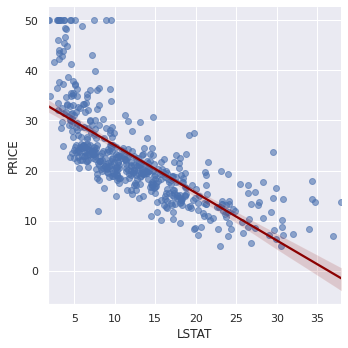

In [73]:
sns.lmplot(x="LSTAT",y="PRICE",data = data,scatter_kws={"alpha" : 0.6},line_kws={"color":"darkred"})
plt.show()

intercept 4.059943871775192
trainning r-square:  0.7930234826697583
test r-square:  0.7446922306260735


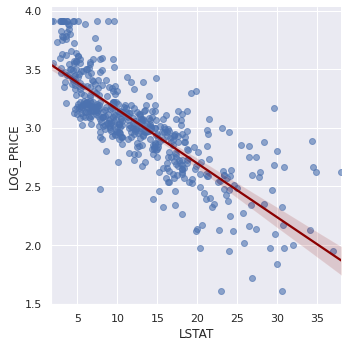

In [84]:
prices = np.log(data["PRICE"])
features = data.drop("PRICE",axis = 1)
x_train,x_test, y_train,y_test = train_test_split(features,prices,test_size = .2,random_state = 10)
regr = LinearRegression()
regr.fit(x_train,y_train)

print("intercept",regr.intercept_)
pd.DataFrame(data = regr.coef_,index=x_train.columns)
print("trainning r-square: ",regr.score(x_train,y_train))
print("test r-square: ",regr.score(x_test,y_test))

sns.lmplot(x="LSTAT",y="LOG_PRICE",data = transformed_data,scatter_kws={"alpha" : 0.6},line_kws={"color":"darkred"})
plt.show()